In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.cluster import KMeans

def plot_hsv(hsv, rgb):
    '''
    description: plot HSV color space graphs
    args:
        hsv (ndarray): [[h_1, s_1, v_1], [h_2, s_2, v_2], ... , [h_n, s_n, v_n]]
        rgb (ndarray): [[r_1, g_1, b_1], [r_2, g_2, b_2], ... , [r_n, g_n, b_n]]
    '''
    h = hsv[:,0] # hue (0° - 180°) - you need to double it because 360 is not a uint8 number
    s = hsv[:,1] # saturation
    v = hsv[:,2] # value
    
    # sort of cylindrical coordinates
    x = np.cos(h * np.pi/90) * s * v/255
    y = np.sin(h * np.pi/90) * s * v/255
    z = v

    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x,y,z, c=rgb/255, marker='o')
    plt.show()

    f, ax = plt.subplots(1,3, figsize=(16,4))
    ax[0].scatter(x, y, c=rgb/255,marker='o')
    ax[1].scatter(x, z, c=rgb/255,marker='o')
    ax[2].scatter(y, z, c=rgb/255,marker='o')
    plt.show()
    
def kmean_color(color_space, k):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(color_space)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    color_space_assigned = kmeans.predict(color_space)
    cluster_colors = np.array([[0,0,0]]* len(color_space_assigned), dtype=np.uint8)
    
    for i, label in enumerate(color_space_assigned):
        cluster_colors[i] = centroids[label]
    print('KMeans \t k = {}'.format(k))

    tmp = cv2.cvtColor(np.array([cluster_colors]), cv2.COLOR_HSV2RGB)
    plot_hsv(color_space, tmp[0,:,:])

Number of points sampled: 7963


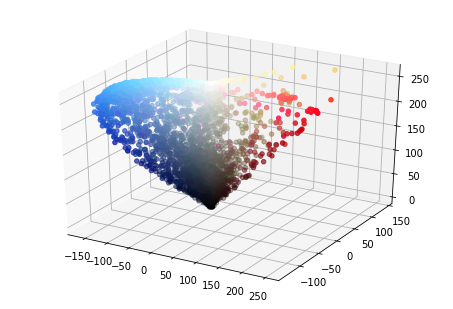

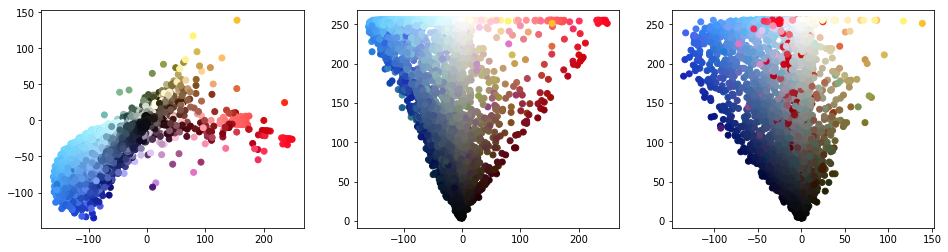

KMeans 	 k = 11


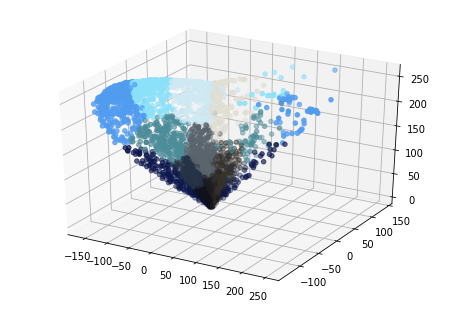

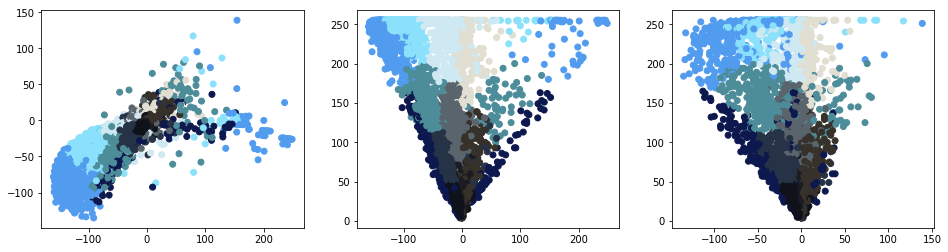

In [2]:
img = cv2.imread('NZ.jpg') # BGR
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

flat_bgr = img.reshape(img.shape[0] * img.shape[1], 3) # make RGB values into a flat array
flat_hsv = hsv.reshape(hsv.shape[0] * hsv.shape[1], 3) # make RGB values into a flat array

sample_rate = 500
sample_bgr = np.array([flat_bgr[i] for i in range(0, len(flat_bgr), sample_rate)])
sample_hsv = np.array([flat_hsv[i] for i in range(0, len(flat_hsv), sample_rate)])
sample_rgb = sample_bgr[:, ::-1]
print('Number of points sampled:', len(sample_bgr))
# plt.imshow(hsv[:,:,0], cmap='gray')
# plt.show()
# plt.imshow(hsv[:,:,1], cmap='gray')
# plt.show()
# plt.imshow(hsv[:,:,2], cmap='gray')
# plt.show()
plot_hsv(sample_hsv, sample_rgb)
kmean_color(sample_hsv, 11)

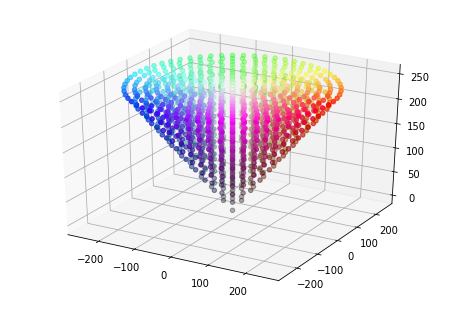

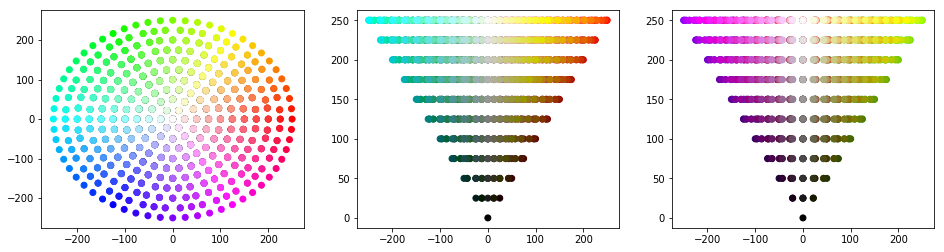

KMeans 	 k = 4


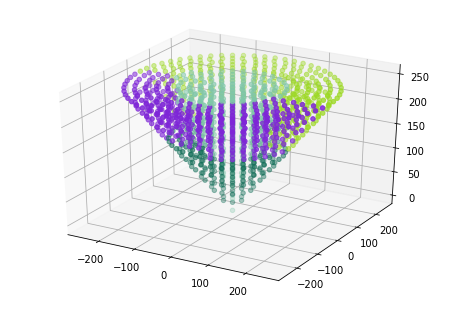

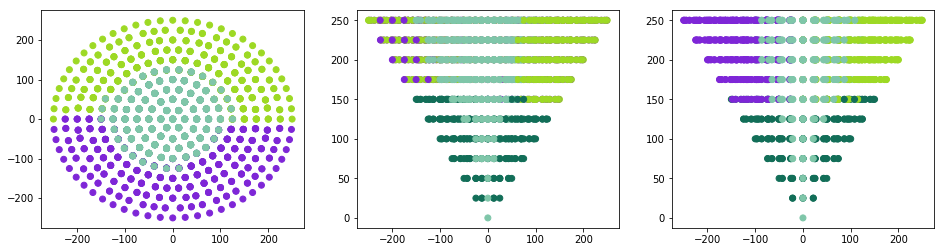

In [3]:
step = 25
rgb_uniform = np.array([[0,0,0]]* (255//step + 1)**3, dtype=np.uint8)

for i, r in enumerate(range(0,255, step)):
    for j, g in enumerate(range(0, 255, step)):
        for k, b in enumerate(range(0, 255, step)):
            rgb_uniform[i * (255//step + 1)**2 + 1 + (255//step + 1) * j + k - 1] = np.array([r,g,b], dtype=np.uint8)
bgr_uniform = rgb_uniform[:,::-1]
bgr_3d = np.array([rgb_uniform[:,::-1]], dtype=np.uint8)

hsv_3d = cv2.cvtColor(bgr_3d, cv2.COLOR_BGR2HSV)
hsv_uniform = hsv_3d.reshape(hsv_3d.shape[0] * hsv_3d.shape[1], 3)

plot_hsv(hsv_uniform, rgb_uniform)
kmean_color(hsv_uniform, 4)
